Cleaning and preparing data for model training


A retail company 'ABC' wants to understand the custome purchase behaviour (spcifically purchase amount) against various products of different categories. they have shared purchase summary if various customers for selected high volumne products from last month.
The data set also contains customer demographics (age, gender, maritial status,city_type,stay_in_current_city), product details(product_id and product category) and total purchase-amount from last month.
Now, they want to build a model to predict the purchase amount of customer against various products whoch will help them to create pertsonalized offer for cusotmers against different products

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1.0,1.0,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0.0,3.0,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1.0,5.0,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1.0,4.0,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0.0,4.0,5.0,12.0


In [ ]:
#Merge both train and test
#so that the one preprocessing data for both dataset will be preprocessed
# we can use Merge/append from pandas as well, here were are using another method
df = df_train.append(df_test)

<ipython-input-42-57de37044f1a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


In [ ]:
#basic
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297441 entries, 0 to 229680
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     297441 non-null  int64  
 1   Product_ID                  297440 non-null  object 
 2   Gender                      297440 non-null  object 
 3   Age                         297440 non-null  object 
 4   Occupation                  297440 non-null  float64
 5   City_Category               297439 non-null  object 
 6   Stay_In_Current_City_Years  297439 non-null  object 
 7   Marital_Status              297439 non-null  float64
 8   Product_Category_1          297439 non-null  float64
 9   Product_Category_2          205046 non-null  float64
 10  Product_Category_3          90430 non-null   float64
 11  Purchase                    67759 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 29.5+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,2.974410e+05,297440.000000,297439.000000,297439.000000,205046.000000,90430.000000,67759.000000
mean,1.002946e+06,8.099997,0.408568,5.283228,9.856354,12.677883,9295.979899
std,2.507825e+03,6.522885,0.491570,3.735140,5.090801,4.122957,4962.435754
min,1.000000e+01,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001465e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5865.000000
50%,1.002968e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8052.000000
75%,1.004343e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12044.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [ ]:
##delete user_id as it doesnt impact my dataset
df.drop(['User_ID'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
#fixing categorical features (gender, age etc)
# we need to convert categorical into numerical
# if we use this pd.get_dummies(df['Gender']) then we get Female as 0 and Male as 1
df['Gender']=df['Gender'].map({'F':0,'M':1})
#or df['Gender']= pd.get_dummies(df['Gender'],drop_first=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0.0,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0.0,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0.0,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1.0,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


Handling Age

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', nan],
      dtype=object)

In [ ]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [ ]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
# If we have 3 categoris, 2 categories are sufficient to represent all 3, hence we are dropping one

In [ ]:
df=pd.concat([df,df_city],axis=1)
# axis=1 means adding column wise
df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,1.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0.0,1.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0.0,1.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0.0,1.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1.0,7.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [ ]:
df.drop('City_Category',axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,1.0,10.0,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0.0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0.0,1.0,10.0,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0.0,1.0,10.0,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1.0,7.0,16.0,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [ ]:
#Missing Values

In [ ]:
df.isnull().sum()

Product_ID                         1
Gender                             1
Age                                1
Occupation                         1
Stay_In_Current_City_Years         2
Marital_Status                     2
Product_Category_1                 2
Product_Category_2             92395
Product_Category_3            207011
Purchase                      229682
B                                  0
C                                  0
dtype: int64

In [ ]:
#in youtube data only 1,2,3 has null values
df['Product_Category_1'].unique()

array([ 3.,  1., 12.,  8.,  5.,  4.,  2.,  6., 14., 11., 13., 15.,  7.,
       16., 18., 10., 17.,  9.])

In [ ]:
# If values are descerete we replace missing value with mode
df['Product_Category_1'].mode()[0]

5.0

In [ ]:
df['Product_Category_1']=df['Product_Category_1'].fillna(df['Product_Category_1'].mode()[0])

In [ ]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Product_ID']=df['Product_ID'].fillna(df['Product_ID'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].fillna(df['Stay_In_Current_City_Years'].mode()[0])
df['Marital_Status']=df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])


<ipython-input-66-bfc6bae315df>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      229682
B                                  0
C                                  0
dtype: int64

In [ ]:
#For Purchase we should do cross validation


In [ ]:
#we need to convert object type to integers since we replaced 4+ with 4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297441 entries, 0 to 229680
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  297441 non-null  object 
 1   Gender                      297441 non-null  float64
 2   Age                         297441 non-null  float64
 3   Occupation                  297441 non-null  float64
 4   Stay_In_Current_City_Years  297441 non-null  int64  
 5   Marital_Status              297441 non-null  float64
 6   Product_Category_1          297441 non-null  float64
 7   Product_Category_2          297441 non-null  float64
 8   Product_Category_3          297441 non-null  float64
 9   Purchase                    67759 non-null   float64
 10  B                           297441 non-null  uint8  
 11  C                           297441 non-null  uint8  
dtypes: float64(8), int64(1), object(1), uint8(2)
memory usage: 25.5+ MB


In [ ]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297441 entries, 0 to 229680
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  297441 non-null  object 
 1   Gender                      297441 non-null  float64
 2   Age                         297441 non-null  float64
 3   Occupation                  297441 non-null  float64
 4   Stay_In_Current_City_Years  297441 non-null  int64  
 5   Marital_Status              297441 non-null  float64
 6   Product_Category_1          297441 non-null  float64
 7   Product_Category_2          297441 non-null  float64
 8   Product_Category_3          297441 non-null  float64
 9   Purchase                    67759 non-null   float64
 10  B                           297441 non-null  int64  
 11  C                           297441 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 29.5+ MB


In [ ]:
## Visualisation
sns.pairplot(df)

Error in callback <function flush_figures at 0x7c50f4511b40> (for post_execute):


KeyboardInterrupt: 

<Axes: xlabel='Age', ylabel='Purchase'>

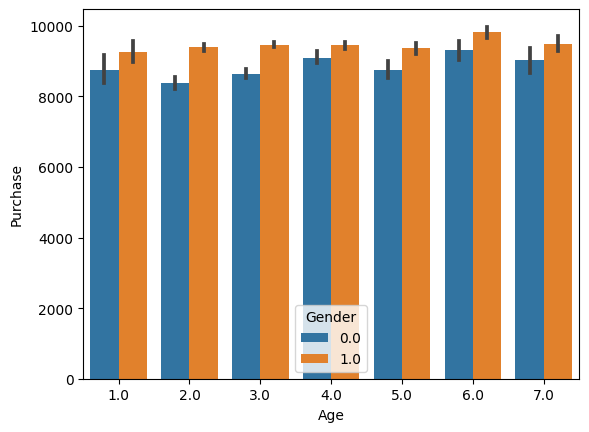

In [ ]:
#Age vs Purchase
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

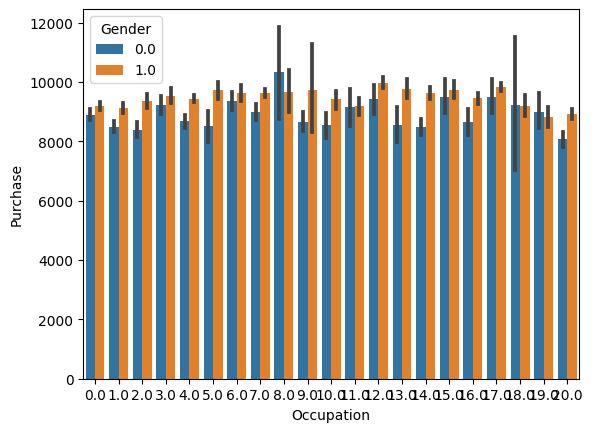

In [ ]:
#Purchase vs occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

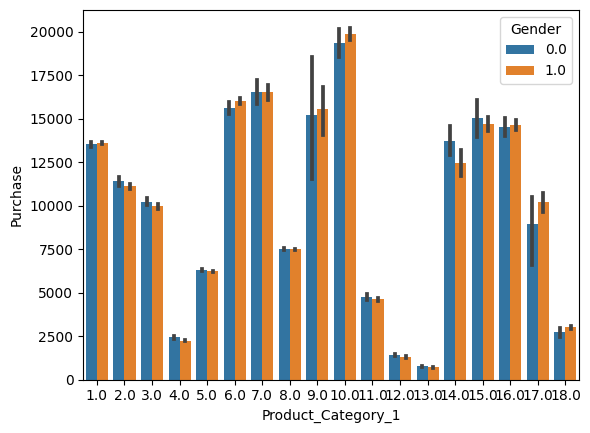

In [ ]:
#Product_Category_1 vs occupation
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

In [ ]:
#Feature Scaling
#wherever purchase is null it is test data because we appended train and tst
df['Purchase'].isnull().sum()
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]

In [ ]:
X= df_train.drop('Purchase',axis=1)
y=df_train['Purchase']

In [ ]:
X.shape


(67759, 11)

In [ ]:
y.shape

(67759,)

In [ ]:
#No.of rows in X and Y should be same

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

ValueError: could not convert string to float: 'P00155242'

In [ ]:
#could not convert string to float: 'P00155242'
#so drop Product_ID

In [ ]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
#Dataset is ready to train the model
